In [2]:
import pandas as pd
import numpy as np

import tensorly as tl
from tqdm import tqdm
import imageio

import matplotlib.pyplot as plt

Array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

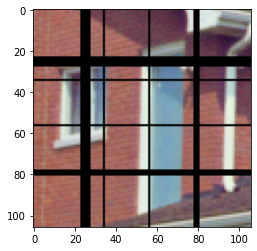

In [17]:
T = imageio.imread('house.bmp')[100:-50,100:-50]
T.shape
np.random.seed(4)
# T = tl.tensor(np.random.normal(0,1,[40,40,3]))
n,m,i = T.shape
# i = np.random.randint(0,n,10)
# i[0] = 1
# j = np.random.randint(0,m,10)
# j[0] = 2
i = [23,24,25,26,27,78,79,80,56,34]
j = [23,24,25,26,27,78,79,80,56,34]
mask = np.ones((n,m)).astype(bool)
mask[i,:] = False
mask[:,j] = False
TM = T.copy()
TM[~mask] = [0,0,0]
fig,ax = plt.subplots()

plt.imshow(T)
plt.imshow(TM)
TM[~mask]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


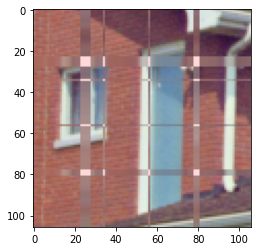

In [19]:
fig,ax = plt.subplots()

# plt.imshow(T)
plt.imshow(T_new.astype(int))


## (Geng et al., 2011) 


In [22]:
#Create random tensor, will be replaced by Spectrogram afterwards


T = tl.tensor(T).astype(np.double)
TM = T.copy()
TM[~mask] = np.nan #Tensor with missing values
# tensorly.decomposition.
# (np.nanmean(TM,axis=0)[:,np.newaxis]+np.nanmean(TM,axis=1)[np.newaxis])
Xm = np.nanmean(TM,axis=1)
Ym = np.nanmean(TM,axis=0)

Xm[np.isnan(Xm)] = 0
Ym[np.isnan(Ym)] = 0
Mm = Xm[:,np.newaxis]+Ym[np.newaxis]
Mm[Mm[:,:,0]==0,:] = np.nanmean(Mm,axis=(0,1))

#not needed but to be sure

T_new = TM.copy()
T_new[~mask] = Mm[~mask]

max_it = 1000
norm = 1
epsilon = 1e-10
r = 50
i = 0
bar = tqdm()
while (i<max_it) & (norm > epsilon):
    
    T_old = T_new
    T_old[mask] = TM[mask]

    T_new = tl.tucker_to_tensor(tl.decomposition.tucker(tensor=T_old,rank=r,n_iter_max=100))
    norm = tl.norm(TM[mask] - T_new[mask])/tl.norm(TM[mask])
    i += 1
    bar.update(1)
    bar.set_description("norm : " + str(norm))

norm,max_it

/tmp/ipykernel_9215/3779882706.py:9: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(TM,axis=1)
/tmp/ipykernel_9215/3779882706.py:10: RuntimeWarning: Mean of empty slice
  Ym = np.nanmean(TM,axis=0)
norm : 0.009560599830755292: : 27it [02:04,  4.60s/it]


KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


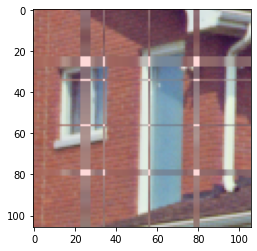

In [21]:
fig,ax = plt.subplots()

# plt.imshow(T)
plt.imshow(T_new.astype(int))


In [26]:
np.random.seed(4)
T = tl.tensor(np.random.normal(0,1,[40,40,3]))
n,m,i = T.shape
i = np.random.randint(0,n,50)
i[0] = 1
j = np.random.randint(0,m,50)
j[0] = 2
mask = np.ones((n,m)).astype(bool)
mask[i,:] = False
mask[:,j] = False

TM = T.copy()
TM[~mask] = np.nan #Tensor with missing values
# tensorly.decomposition.
# (np.nanmean(TM,axis=0)[:,np.newaxis]+np.nanmean(TM,axis=1)[np.newaxis])
Xm = np.nanmean(TM,axis=1)
Ym = np.nanmean(TM,axis=0)

Xm[np.isnan(Xm)] = 0
Ym[np.isnan(Ym)] = 0
Mm = Xm[:,np.newaxis]+Ym[np.newaxis]
Mm[Mm[:,:,0]==0,:] = np.nanmean(Mm,axis=(0,1))

#not needed but to be sure

T_new = TM.copy()
T_new[~mask] = Mm[~mask]

max_it = 1000
norm = 1
epsilon = 1e-10
r = 10
i = 0
while (i<max_it) & (norm > epsilon):
    
    T_old = T_new
    T_old[mask] = TM[mask]

    T_new = tl.tucker_to_tensor(tl.decomposition.tucker(tensor=T_old,rank=r,n_iter_max=100))
    norm = tl.norm(T_old[mask] - T_new[mask])/tl.norm(T_old[mask])
    i += 1

norm,max_it

/tmp/ipykernel_9584/3215433506.py:16: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(TM,axis=1)
/tmp/ipykernel_9584/3215433506.py:17: RuntimeWarning: Mean of empty slice
  Ym = np.nanmean(TM,axis=0)


KeyboardInterrupt: 

In [10]:
def khatri_rao(A,B):
    assert A.shape[1] == B.shape[1], "A and B must have the same number of columns"
    return np.einsum('ir,jr->ijr',A,B).reshape(A.shape[0]*B.shape[0],A.shape[1])

def CP_ALS(T, rank, epsilon=1e-5,max_iters=100,verbose=True,errors_at_iterations=[]):
    # Initialize A, B and C
    # YOUR CODE HERE
    
    A,B,C = [np.random.normal(0,1, [d,rank]) for d in T.shape]


    T_approx_old = tl.kruskal_to_tensor((np.ones(rank),[A,B,C]))
    it = 1
    while True: # repeat until convergence
        # update the factor matrices A, B and C. Here are a couple of indications:
        # - to efficiently solve a least square problem you can use numpy.lstsq
        # - matricizations (unfolding) of T can be obtained using tl.unfold
        # - to compute the Khatri-Rao product use the function khatri_rao defined above
        # YOUR CODE HERE

        A = np.linalg.lstsq(a=khatri_rao(B,C),b=tl.unfold(T,mode=0).T,rcond=None)[0].T
        B = np.linalg.lstsq(a=khatri_rao(A,C),b=tl.unfold(T,mode=1).T,rcond=None)[0].T
        C = np.linalg.lstsq(a=khatri_rao(A,B),b=tl.unfold(T,mode=2).T,rcond=None)[0].T
        # check for convergence:
        T_approx_new = tl.kruskal_to_tensor((np.ones(rank),[A,B,C]))
        reconstruction_error =  tl.norm(T_approx_new-T)
        errors_at_iterations.append(reconstruction_error)  
      
        if tl.norm(T_approx_old - T_approx_new)/tl.norm(T_approx_old) < epsilon or it > max_iters:
            return (A,B,C)
        if verbose:
            print(it, " - reconstruction error: ",reconstruction_error, "convergence: ", tl.norm(T_approx_old - T_approx_new)/tl.norm(T_approx_old))

        
        T_approx_old = T_approx_new
        it += 1

rank = 2
A,B,C = [np.random.normal(0,1, [d,rank]) for d in T.shape]



SyntaxError: Missing parentheses in call to 'print'. Did you mean print('Successfully Exit')? (helios.py, line 30)